In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [40]:
diabetes_data = pd.read_csv('diabetes.csv')

In [41]:
diabetes_data.columns

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')

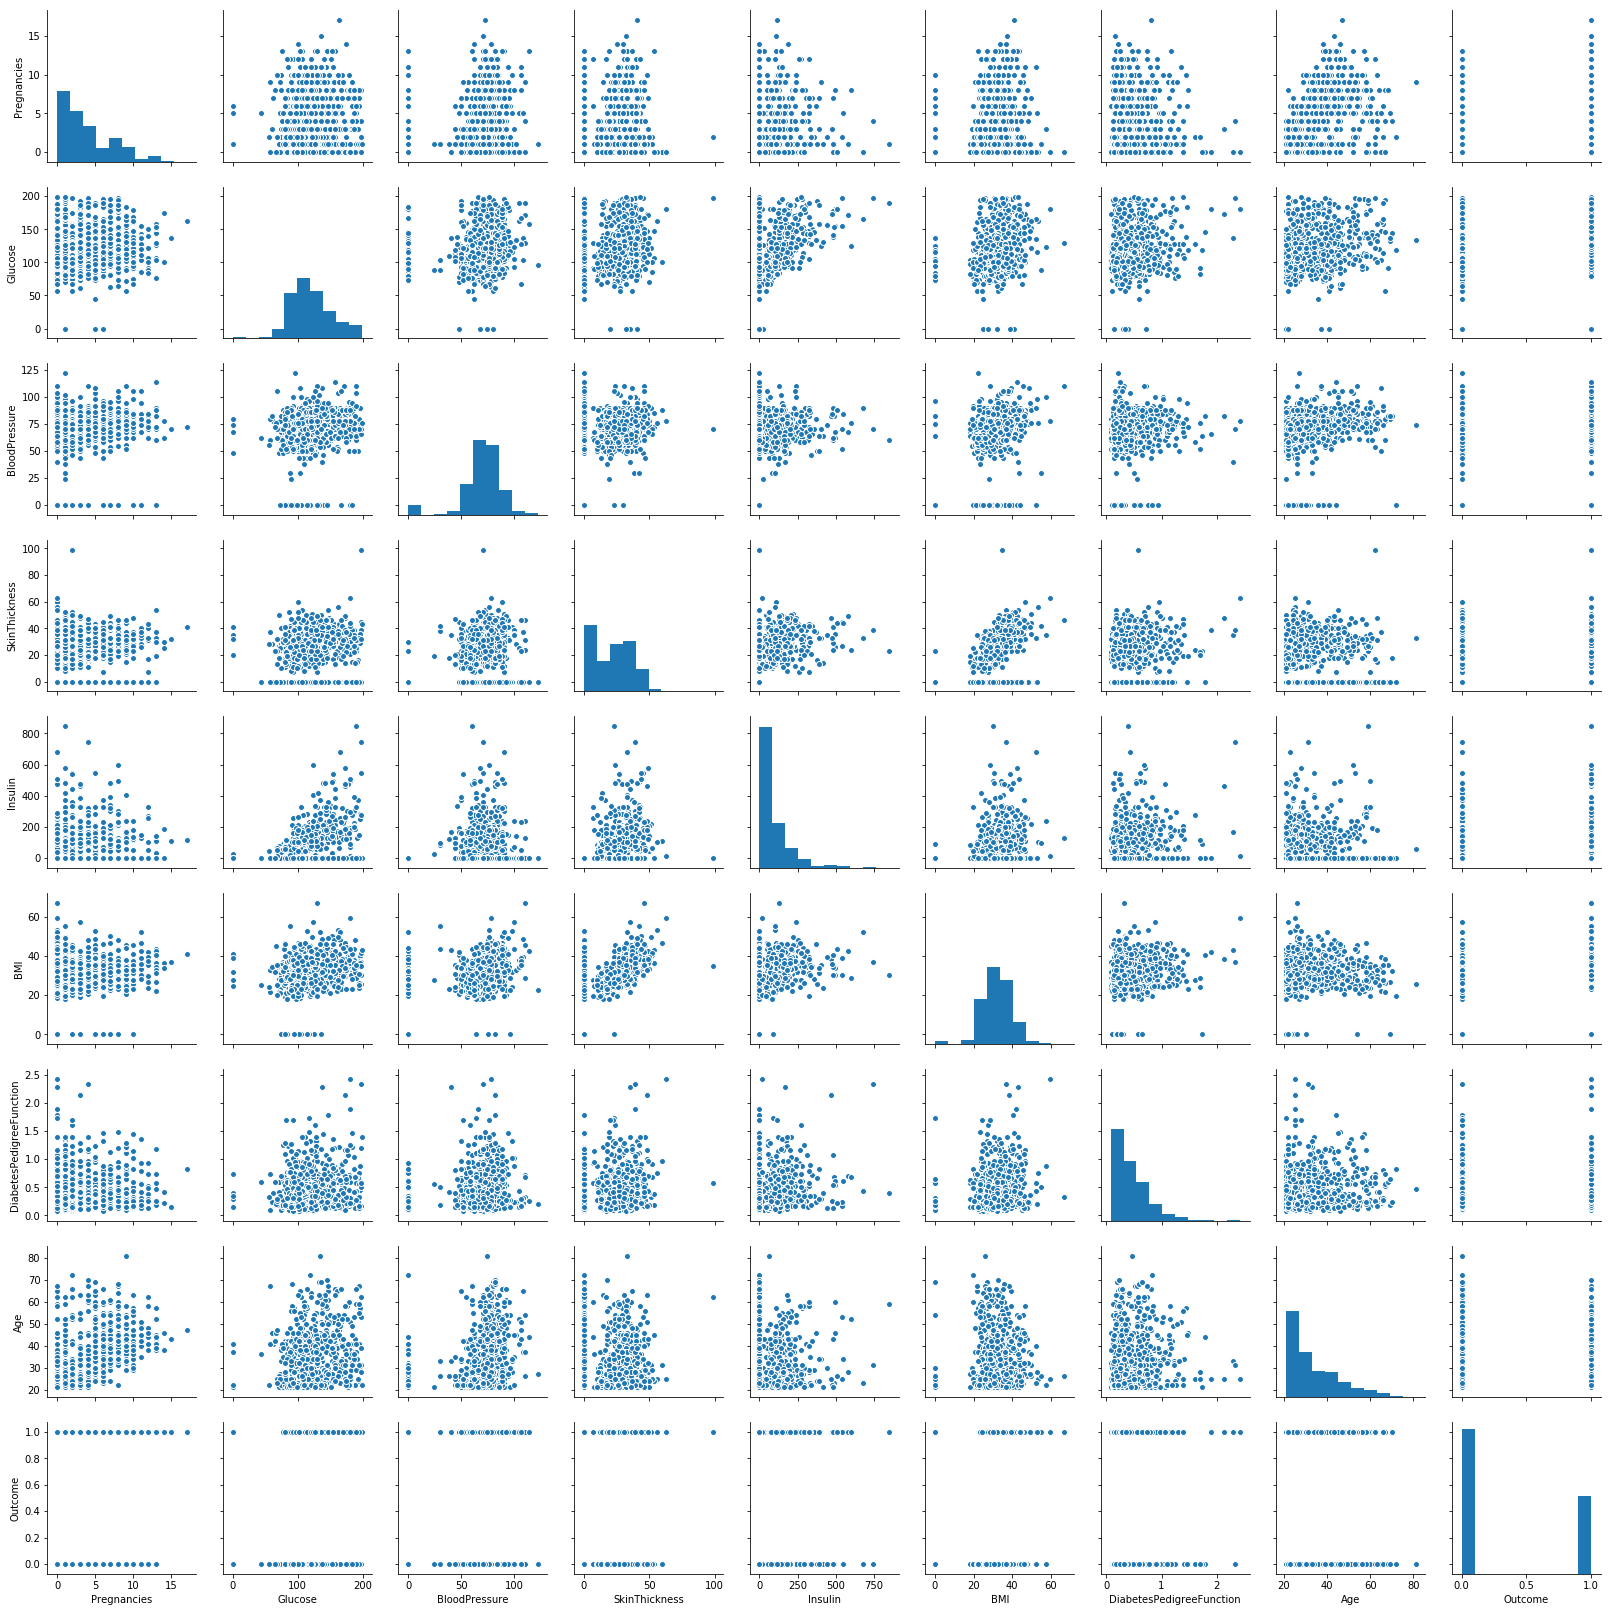

In [42]:
#Visulization of the features (Using Scatter Matrix)
relation_image=sns.pairplot(diabetes_data)

In [43]:
cor = diabetes_data[diabetes_data.columns].corr()

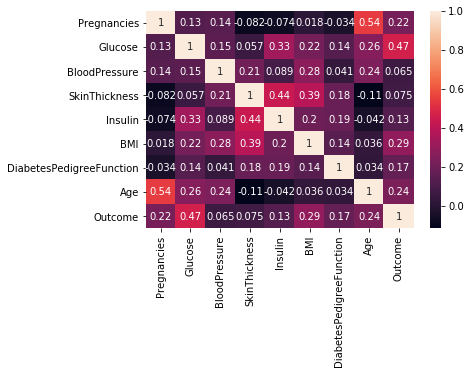

In [44]:
#Corelation values between the features
correl_image=sns.heatmap(cor,annot=True)

In [45]:
column_to_normalize = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

In [46]:
diabetes_data[column_to_normalize] = diabetes_data[column_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [47]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [48]:
preg = tf.feature_column.numeric_column('Pregnancies')
glucose = tf.feature_column.numeric_column('Glucose')
BP = tf.feature_column.numeric_column('BloodPressure')
skin_thickness = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree_function = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

#age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])


In [49]:
feat_cols = [preg,glucose,BP,skin_thickness,insulin,bmi,pedigree_function]

In [50]:
x_data = diabetes_data.drop('Outcome',axis=1)

In [51]:
labels = diabetes_data['Outcome']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state=101)

In [53]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [54]:
model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/z_/7hb7_rgd6l76j3b10qyl2z7w0000gn/T/tmpEDypUV', '_save_summary_steps': 100}


In [55]:
#training
model.train(input_fn=input_fn,steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/z_/7hb7_rgd6l76j3b10qyl2z7w0000gn/T/tmpEDypUV/model.ckpt.
INFO:tensorflow:loss = 6.86209, step = 1
INFO:tensorflow:global_step/sec: 495.496
INFO:tensorflow:loss = 4.9239, step = 101 (0.204 sec)
INFO:tensorflow:global_step/sec: 512.989
INFO:tensorflow:loss = 3.43957, step = 201 (0.194 sec)
INFO:tensorflow:global_step/sec: 524.447
INFO:tensorflow:loss = 4.90023, step = 301 (0.191 sec)
INFO:tensorflow:global_step/sec: 530.459
INFO:tensorflow:loss = 4.70937, step = 401 (0.188 sec)
INFO:tensorflow:global_step/sec: 527.409
INFO:tensorflow:loss = 5.80401, step = 501 (0.190 sec)
INFO:tensorflow:global_step/sec: 527.293
INFO:tensorflow:loss = 3.82367, step = 601 (0.190 sec)
INFO:tensorflow:global_step/sec: 505.219
INFO:tensorflow:loss = 6.62823, step = 701 (0.198 sec)
INFO:tensorflow:global_step/sec: 475.023
INFO:tensorflow:loss = 2.90055, step = 801 (0.211 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 503.342
INFO:tensorflow:loss = 3.80573, step = 8401 (0.199 sec)
INFO:tensorflow:global_step/sec: 515.482
INFO:tensorflow:loss = 2.43852, step = 8501 (0.194 sec)
INFO:tensorflow:global_step/sec: 537.909
INFO:tensorflow:loss = 2.544, step = 8601 (0.186 sec)
INFO:tensorflow:global_step/sec: 535.573
INFO:tensorflow:loss = 6.41175, step = 8701 (0.187 sec)
INFO:tensorflow:global_step/sec: 533.381
INFO:tensorflow:loss = 6.22319, step = 8801 (0.188 sec)
INFO:tensorflow:global_step/sec: 534.374
INFO:tensorflow:loss = 5.43173, step = 8901 (0.187 sec)
INFO:tensorflow:global_step/sec: 532.881
INFO:tensorflow:loss = 5.82165, step = 9001 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.355
INFO:tensorflow:loss = 4.33158, step = 9101 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.282
INFO:tensorflow:loss = 5.41758, step = 9201 (0.188 sec)
INFO:tensorflow:global_step/sec: 533.015
INFO:tensorflow:loss = 3.57812, step = 9301 (0.187 sec)
INFO:tensorflow:global_step/sec:

In [56]:
# Evaluation
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)


In [57]:
result = model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-20-17:01:49
INFO:tensorflow:Restoring parameters from /var/folders/z_/7hb7_rgd6l76j3b10qyl2z7w0000gn/T/tmpEDypUV/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2017-12-20-17:01:51
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.757576, accuracy_baseline = 0.649351, auc = 0.834609, auc_precision_recall = 0.719917, average_loss = 0.490131, global_step = 10000, label/mean = 0.350649, loss = 4.71751, prediction/mean = 0.388994


In [58]:
result


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83460909,
 'auc_precision_recall': 0.71991658,
 'average_loss': 0.4901309,
 'global_step': 10000,
 'label/mean': 0.35064936,
 'loss': 4.7175097,
 'prediction/mean': 0.3889944}

In [59]:
#Prediction
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1000,shuffle=False)

In [60]:
predict = model.predict(input_fn=pred_input_func)

In [61]:
list(predict)

INFO:tensorflow:Restoring parameters from /var/folders/z_/7hb7_rgd6l76j3b10qyl2z7w0000gn/T/tmpEDypUV/model.ckpt-10000


[{'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.37751067], dtype=float32),
  'logits': array([-0.50012767], dtype=float32),
  'probabilities': array([ 0.62248933,  0.37751067], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array(['1'], dtype=object),
  'logistic': array([ 0.87999982], dtype=float32),
  'logits': array([ 1.99242866], dtype=float32),
  'probabilities': array([ 0.12000015,  0.87999982], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.1400781], dtype=float32),
  'logits': array([-1.81464148], dtype=float32),
  'probabilities': array([ 0.85992193,  0.14007811], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.26900473], dtype=float32),
  'logits': array([-0.99967802], dtype=float32),
  'probabilities': array([ 0.7309953 ,  0.26900473], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0